# World population data and world Electricity usage data

In [1]:
from IPython.display import HTML
import numpy as np
import bs4
from pandas import Series
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import requests

## Data scraping from websit

In [2]:
rep = requests.get('https://www.cia.gov/library/publications/the-world-factbook/fields/252rank.html')

In [3]:
soup = bs4.BeautifulSoup(rep.text, "html.parser")

In [4]:
soup.title

<title>Country Comparison :: Electricity - production â The World Factbook - Central Intelligence Agency</title>

In [5]:
soup.p

<p>Discover the CIA <a href="/about-cia/">history, mission, vision and values</a>.</p>

In [6]:
i = 0
data = soup.find_all('td')
while i < len(data)-1:
    data[i] = data[i].string
    i= i+1
data2 = list(filter(None, data))
data2
print(len(data2))

660


In [7]:
j = 0
data1 = soup.find_all(attrs={'class':'region'})
while j < len(data1)-1:
    data1[j] = data1[j].a.string
    j= j+1
data3 = list(filter(None, data1))
data3
print(len(data3))

220


In [32]:
f = open('Electricity_data.csv','w') 
p = 0 
l = len(data2)-1 
f.write("Rank, Electricity usage, Year of information\n")
while p < l: 
    f.write(str(data2[p]) + ", ") 
    p = p + 1
    f.write(str(data2[p]).replace(',', '') + ", ") 
    p = p + 1
    f.write(str(data2[p]) + "\n")
    p = p + 1

f.close()

In [33]:
f1 = open('Country_data.csv','w') 
p1 = 0 
l1 = len(data3)-1 
f1.write("Country\n")
while p1 < l1: 
    f1.write(str(data3[p1]).replace(',', ' ') + "\n ") 
    p1 = p1 + 1 

f1.close()

## Convert the csv file into pandas datafram

In [46]:
Edata = pd.read_csv('Electricity_data.csv')
Edata

,Rank,Electricity usage,Year of information
0,1,5883000000000,2016 est.
1,2,4095000000000,2016 est.
2,3,1386000000000,2016 est.
3,4,1031000000000,2016 est.
4,5,989300000000,2016 est.
...,...,...,...
215,216,3000000,2016 est.
216,217,60600,2009
217,218,51000,2011 est.
218,219,0,2016 est.


In [45]:
Cdata = pd.read_csv('Country_data.csv')
Cdata

,Country
0,China
1,United States
2,India
3,Russia
4,Japan
...,...
214,Saint Helena Ascension and Tristan da Cunha
215,Niue
216,Northern Mariana Islands
217,Gaza Strip


In [47]:
Edata['Country'] = Cdata['Country']

In [48]:
Edata = Edata.drop(219)
Edata

,Rank,Electricity usage,Year of information,Country
0,1,5883000000000,2016 est.,China
1,2,4095000000000,2016 est.,United States
2,3,1386000000000,2016 est.,India
3,4,1031000000000,2016 est.,Russia
4,5,989300000000,2016 est.,Japan
...,...,...,...,...
214,215,7000000,2016 est.,Saint Helena Ascension and Tristan da Cunha
215,216,3000000,2016 est.,Niue
216,217,60600,2009,Northern Mariana Islands
217,218,51000,2011 est.,Gaza Strip


In [49]:
Edata.describe()

,Rank,Electricity usage
count,219.000000,2.190000e+02
mean,110.000000,1.084880e+11
std,63.364028,5.052615e+11
min,1.000000,0.000000e+00
25%,55.500000,5.175000e+08
50%,110.000000,7.883000e+09
75%,164.500000,4.559500e+10
max,219.000000,5.883000e+12


In [8]:
rep1 = requests.get('https://www.cia.gov/library/publications/the-world-factbook/fields/335rank.html')

In [41]:
soup1 = bs4.BeautifulSoup(rep1.text, "html.parser")

In [33]:

k = 0
pdata = soup1.find_all('td')
while k < len(pdata)-1:
    pdata[k] = pdata[k].string
    k= k+1
pdata2 = list(filter(None, pdata2))

In [22]:
h = 0
pdata1 = soup1.find_all(attrs={'class':'region'})
while h < len(pdata1)-1:
    pdata1[h] = pdata1[h].a.string
    h= h+1
pdata3 = list(filter(None, pdata1))
pdata3
print(len(pdata3))

238


In [36]:
f2 = open('Population.csv', 'w')
p2 = 0
l2 = 696
f2.write('Rank, Population, Year of information \n')
while p2<l2:
    f2.write(str(pdata2[p2]) + ',')
    p2=p2+1
    f2.write(str(pdata2[p2]).replace(',', '') +',')
    p2=p2+1
    f2.write(str(pdata2[p2]) + '\n')
    p2=p2+1
f2.close()

In [26]:
f3 = open('Country.csv','w') 
p3 = 0 
l3 = len(pdata3)-1 
f3.write("Country\n")
while p3 < l3: 
    f3.write(str(pdata3[p3]).replace(',', ' ') + "\n ") 
    p3 = p3 + 1 

f3.close()

In [38]:
Pdata = pd.read_csv('Population.csv')
Cdata1 = pd.read_csv('Country.csv')

In [39]:
Pdata['Country'] = Cdata1['Country']

In [40]:
Pdata

,Rank,Population,Year of information,Country
0,1,1384688986,July 2018 est.,China
1,2,1296834042,July 2018 est.,India
2,3,329256465,July 2018 est.,United States
3,4,262787403,July 2018 est.,Indonesia
4,5,208846892,July 2018 est.,Brazil
...,...,...,...,...
227,228,5315,July 2018 est.,Montserrat
228,229,3198,2016 est.,Falkland Islands (Islas Malvinas)
229,230,2583,July 2017 est.,Svalbard
230,231,2205,July 2016 est.,Christmas Island


## Merge population and electricity data

In [52]:
Comparison = pd.merge(Pdata, Edata, on= 'Country', how = 'inner')
Comparison.head(20)

,Rank_x,Population,Year of information,Country,Rank_y,Electricity usage,Year of information
0,1,1384688986,July 2018 est.,China,1,5883000000000,2016 est.
1,2,1296834042,July 2018 est.,India,3,1386000000000,2016 est.
2,3,329256465,July 2018 est.,United States,2,4095000000000,2016 est.
3,4,262787403,July 2018 est.,Indonesia,20,235400000000,2016 est.
4,5,208846892,July 2018 est.,Brazil,8,567900000000,2016 est.
5,6,207862518,July 2018 est.,Pakistan,32,109700000000,2016 est.
6,7,203452505,July 2018 est.,Nigeria,67,29350000000,2016 est.
7,8,159453001,July 2018 est.,Bangladesh,49,60510000000,2016 est.
8,9,142122776,July 2018 est.,Russia,4,1031000000000,2016 est.
9,10,126168156,July 2018 est.,Japan,5,989300000000,2016 est.


In [64]:
Comparison.columns

Index(['Rank_x', ' Population', ' Year of information ', 'Country', 'Rank_y',
       ' Electricity usage', ' Year of information'],
      dtype='object')

In [71]:
x = Comparison.iloc[:, 1]/1e6
y = Comparison.iloc[:, 5]/1e6

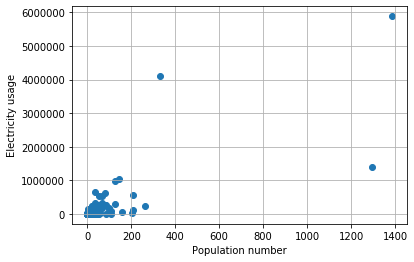

In [77]:
plt.scatter(x,y)
plt.xlabel('Population number')
plt.ylabel('Electricity usage')
plt.grid()
plt.show()

In [82]:
top10p = Comparison[0:10]
top10p['Electricity usage per person'] = Comparison.iloc[:, 5]/Comparison.iloc[:, 1]
top10p

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rank_x,Population,Year of information,Country,Rank_y,Electricity usage,Year of information,Electricity usage per person
0,1,1384688986,July 2018 est.,China,1,5883000000000,2016 est.,4248.607492
1,2,1296834042,July 2018 est.,India,3,1386000000000,2016 est.,1068.756645
2,3,329256465,July 2018 est.,United States,2,4095000000000,2016 est.,12437.113422
3,4,262787403,July 2018 est.,Indonesia,20,235400000000,2016 est.,895.781142
4,5,208846892,July 2018 est.,Brazil,8,567900000000,2016 est.,2719.216908
5,6,207862518,July 2018 est.,Pakistan,32,109700000000,2016 est.,527.752675
6,7,203452505,July 2018 est.,Nigeria,67,29350000000,2016 est.,144.259713
7,8,159453001,July 2018 est.,Bangladesh,49,60510000000,2016 est.,379.484861
8,9,142122776,July 2018 est.,Russia,4,1031000000000,2016 est.,7254.291177
9,10,126168156,July 2018 est.,Japan,5,989300000000,2016 est.,7841.122763


Text(0, 0.5, 'Electricity usage per person')

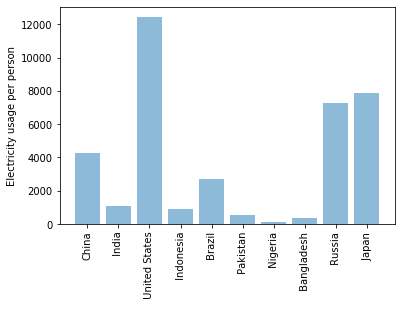

In [90]:
plt.bar(np.arange(10), top10p['Electricity usage per person'], align='center', alpha=0.5)
plt.xticks(np.arange(10), top10p['Country'], rotation = 90)
plt.ylabel('Electricity usage per person')